# Data Transformations2

**Introduction:**
Using the data gathered from Taarifa and the Tanzanian Ministry of Water, can we predict which pumps are functional, which need some repairs, and which don't work at all? Predicting one of these three classes based and a smart understanding of which waterpoints will fail, can improve the maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

This is also an intermediate-level competition by [DataDriven][1]! All code & support scripts are in [Github Repo][2]

[1]: https://www.drivendata.org/competitions/7/ "Link to Competetion Page"
[2]: https://github.com/msampathkumar/datadriven_pumpit "User Code"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from scripts.sam_value_counts import sam_dataframe_cols_value_count_analysis, sam_dataframe_markup_value_counts
from scripts.sam_confusion_matrix import sam_plot_confusion_matrix, sam_confusion_maxtrix
from scripts.sam_variance_check import get_low_variance_columns
from scripts.tools import check_metric, data_transformations, df_check_stats, game, sam_pickle_save, sam_pickle_load

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.decomposition import PCA

np.set_printoptions(precision=5)
np.random.seed(69572)
plt.style.use('ggplot')
sns.set(color_codes=True)

%matplotlib inline

In [2]:
X, y, TEST_X = sam_pickle_load(prefix="tmp/Iteration2_final_")
df_check_stats(X, y, TEST_X)

LOAD PREFIX USED:  tmp/Iteration2_final_
Data Frame Shape: (59400, 43) TotColumns: 43 ObjectCols: 0
Numpy Array Size: 59400
Data Frame Shape: (14850, 43) TotColumns: 43 ObjectCols: 0


In [3]:
# benchmark
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)
clf = game(X_train, X_test, y_train, y_test, algo='rf', )

------------------------------------------------
AC Score: 0.985342312009 F1 Score: 0.985408921295
------------------------------------------------
AC Score: 0.800673400673 F1 Score: 0.806862879864


In [4]:
# benchmark
gbt_clf = game(X_train, X_test, y_train, y_test, algo='gb')

------------------------------------------------
AC Score: 0.758451178451 F1 Score: 0.77953282745
------------------------------------------------
AC Score: 0.755420875421 F1 Score: 0.777454236688


In [5]:
knn_clf = game(X_train, X_test, y_train, y_test, algo='knn')

------------------------------------------------
AC Score: 0.725768799102 F1 Score: 0.734891191246
------------------------------------------------
AC Score: 0.603703703704 F1 Score: 0.616254144617


In [6]:
df_check_stats(X, y, TEST_X)

Data Frame Shape: (59400, 43) TotColumns: 43 ObjectCols: 0
Numpy Array Size: 59400
Data Frame Shape: (14850, 43) TotColumns: 43 ObjectCols: 0


In [7]:
# Variance Threshold
X, removed_features, ranking_variance_thresholds = get_low_variance_columns(dframe=X, threshold=(0.85 * (1 - 0.85)), autoremove=True)
TEST_X.drop(removed_features, axis=1, inplace=True)

Finding low-variance features.
Found 2 low-variance columns.
                
Removing low-variance features.
Reassembling the dataframe (with low-variance features removed).
Succesfully removed low-variance columns.


In [8]:
print(removed_features)

['public_meeting', 'recorded_by']


In [9]:
sam_pickle_save(X, y, TEST_X, prefix="tmp/Iteration2_vt_")

SAVE PREFIX USED:  tmp/Iteration2_vt_


In [10]:
X, y, TEST_X = sam_pickle_load(prefix='tmp/Iteration2_vt_')

df_check_stats(X, y, TEST_X)

LOAD PREFIX USED:  tmp/Iteration2_vt_
Data Frame Shape: (59400, 41) TotColumns: 41 ObjectCols: 0
Numpy Array Size: 59400
Data Frame Shape: (14850, 41) TotColumns: 41 ObjectCols: 0


In [11]:
# benchmark
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)
clf = game(X_train, X_test, y_train, y_test, algo='rf', )

------------------------------------------------
AC Score: 0.985005611672 F1 Score: 0.98507197283
------------------------------------------------
AC Score: 0.797643097643 F1 Score: 0.80432839796


In [12]:
# benchmark
clf = game(X_train, X_test, y_train, y_test, algo='gb', )

------------------------------------------------
AC Score: 0.756363636364 F1 Score: 0.778053353403
------------------------------------------------
AC Score: 0.756228956229 F1 Score: 0.778492089528


In [13]:
# KBest Selection
def find_kbest_cols_count(start=10, stop=37, step=3):
    for kbest_cols in range(start, stop, step):
        print('============================================================', kbest_cols)

        # Load Data
        X, y, TEST_X = sam_pickle_load(prefix='tmp/Iteration2_vt_')

        fit = SelectKBest(score_func=chi2, k=kbest_cols).fit(X, y)
        cols_names = X.columns
        kbest_selected_cols =  [_ for _ in cols_names[:kbest_cols]]

        # transformation
        X = pd.DataFrame(fit.transform(X))
        TEST_X = pd.DataFrame(fit.transform(TEST_X))

        # check
        # df_check_stats(X, y)

        # benchmark
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)
        clf = game(X_train, X_test, y_train, y_test, algo='rf', show_train_scores=False)
    return fit, kbest_selected_cols

In [14]:
fit, cols =  find_kbest_cols_count(start=10, stop=len(X.columns), step=3)

============================================================ 10
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.714141414141 F1 Score: 0.720517619642
============================================================ 13
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.726599326599 F1 Score: 0.732670572958
============================================================ 16
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.762828282828 F1 Score: 0.769713959304
============================================================ 19
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.761818181818 F1 Score: 0.768987911336
============================================================ 22
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.76404040404 F1 Score: 0.770400446

In [15]:
fit, cols =  find_kbest_cols_count(start=29, stop=34, step=1)

============================================================ 29
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.799461279461 F1 Score: 0.805923109705
============================================================ 30
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.796161616162 F1 Score: 0.802754311432
============================================================ 31
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.800269360269 F1 Score: 0.807073661833
============================================================ 32
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.799730639731 F1 Score: 0.80587359584
============================================================ 33
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.798383838384 F1 Score: 0.805126076

In [16]:
fit, cols =  find_kbest_cols_count(start=23, stop=27, step=1)

============================================================ 23
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.796430976431 F1 Score: 0.803540520517
============================================================ 24
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.796835016835 F1 Score: 0.803498486511
============================================================ 25
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.798855218855 F1 Score: 0.805350106632
============================================================ 26
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.800606060606 F1 Score: 0.807100310293


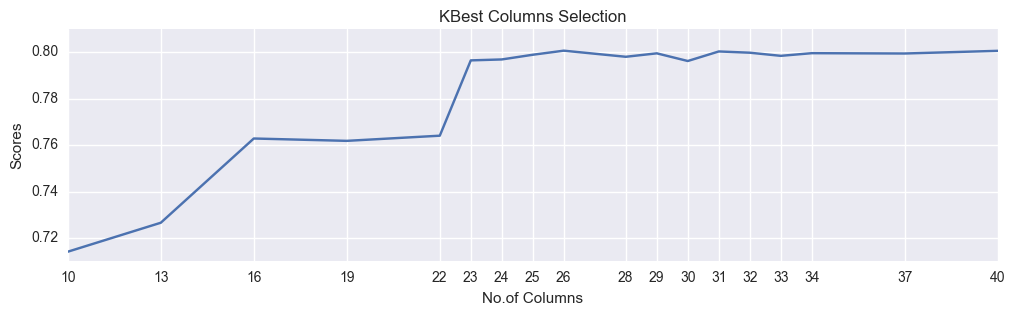

In [18]:
data = '''
============================================================ 10
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.714141414141 F1 Score: 0.720517619642
============================================================ 13
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.726599326599 F1 Score: 0.732670572958
============================================================ 16
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.762828282828 F1 Score: 0.769713959304
============================================================ 19
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.761818181818 F1 Score: 0.768987911336
============================================================ 22
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.76404040404 F1 Score: 0.770400446676
============================================================ 23
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.796430976431 F1 Score: 0.803540520517
============================================================ 24
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.796835016835 F1 Score: 0.803498486511
============================================================ 25
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.798855218855 F1 Score: 0.805350106632
============================================================ 26
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.800606060606 F1 Score: 0.807100310293
============================================================ 28
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.79797979798 F1 Score: 0.804237759375
============================================================ 29
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.799461279461 F1 Score: 0.805923109705
============================================================ 30
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.796161616162 F1 Score: 0.802754311432
============================================================ 31
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.800269360269 F1 Score: 0.807073661833
============================================================ 32
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.799730639731 F1 Score: 0.80587359584
============================================================ 33
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.798383838384 F1 Score: 0.805126076692
============================================================ 34
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.799528619529 F1 Score: 0.805954184926
============================================================ 37
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.799393939394 F1 Score: 0.805938744577
============================================================ 40
LOAD PREFIX USED:  tmp/Iteration2_vt_
------------------------------------------------
AC Score: 0.800538720539 F1 Score: 0.806586827304
'''.strip()

data_k_selections = []
data_k_ac_scores = []
data_k_f1_scores = []

for line in data.strip().splitlines():
    if line.startswith('===='):
        data_k_selections.append(int(line.split()[-1]))
    if line.startswith('AC Score'):
        line = line.split()
        data_k_ac_scores.append(float(line[2]))
        data_k_f1_scores.append(float(line[-1]))

# print(data_k_selections)
# print(data_k_ac_scores)
# print(data_k_f1_scores)

plt.figure(figsize=(12, 3))
plt.plot(data_k_selections, data_k_ac_scores)
plt.xticks(data_k_selections)
plt.xlabel('No.of Columns')
plt.ylabel('Scores')
plt.title('KBest Columns Selection')

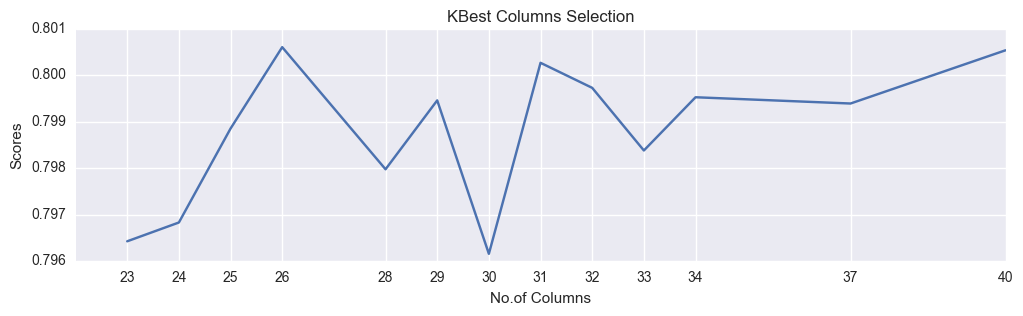

In [19]:
show_tick_from_point = 5

plt.figure(figsize=(12, 3))
plt.plot(data_k_selections[show_tick_from_point:], data_k_ac_scores[show_tick_from_point:])
plt.xticks(data_k_selections[show_tick_from_point:])
plt.xlabel('No.of Columns')
plt.ylabel('Scores')
plt.title('KBest Columns Selection')

In [20]:
# KBEST SELECTION

# # AC Score: 0.801144781145 F1 Score: 0.808254959747
# kbest_cols = 25

# # AC Score: 0.80202020202 F1 Score: 0.808465348624
kbest_cols = 26

print('============================================================', kbest_cols)

# Load Data
X, y, TEST_X = sam_pickle_load(prefix='tmp/Iteration2_vt_')
df_check_stats(X, y, TEST_X)

fit = SelectKBest(score_func=chi2, k=kbest_cols).fit(X, y)
cols_names = X.columns
kbest_selected_cols =  [_ for _ in cols_names[:kbest_cols]]

# transformation
X = pd.DataFrame(fit.transform(X))
TEST_X = pd.DataFrame(fit.transform(TEST_X))

============================================================ 26
LOAD PREFIX USED:  tmp/Iteration2_vt_
Data Frame Shape: (59400, 41) TotColumns: 41 ObjectCols: 0
Numpy Array Size: 59400
Data Frame Shape: (14850, 41) TotColumns: 41 ObjectCols: 0


In [21]:
# benchmark
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)
clf = game(X_train, X_test, y_train, y_test, algo='rf') #, show_train_scores=False)

------------------------------------------------
AC Score: 0.984466891134 F1 Score: 0.984531775973
------------------------------------------------
AC Score: 0.800606060606 F1 Score: 0.807100310293


In [22]:
clf = game(X_train, X_test, y_train, y_test, algo='gb') # , show_train_scores=False)

------------------------------------------------
AC Score: 0.754500561167 F1 Score: 0.775325264771
------------------------------------------------
AC Score: 0.755084175084 F1 Score: 0.776717384512


In [40]:
sam_pickle_save(X, y, TEST_X, prefix='tmp/Iteration2_vt_kb_')

SAVE PREFIX USED:  tmp/Iteration2_vt_kb_


In [41]:
X, y, TEST_X = sam_pickle_load(prefix='tmp/Iteration2_vt_kb_')
df_check_stats(X, y, TEST_X)

LOAD PREFIX USED:  tmp/Iteration2_vt_kb_
Data Frame Shape: (59400, 33) TotColumns: 33 ObjectCols: 0
Numpy Array Size: 59400
Data Frame Shape: (14850, 33) TotColumns: 33 ObjectCols: 0


In [42]:
# PCA
from sklearn.decomposition import PCA

In [43]:
pca = PCA()
fit = pca.fit(X)

X = fit.transform(X)

In [44]:
# benchmark
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)
clf = game(X_train, X_test, y_train, y_test, algo='rf')# , show_train_scores=False)

------------------------------------------------
AC Score: 0.985432098765 F1 Score: 0.985497694018
------------------------------------------------
AC Score: 0.778787878788 F1 Score: 0.786607357931


In [45]:
clf = game(X_train, X_test, y_train, y_test, algo='gb')# , show_train_scores=False)

------------------------------------------------
AC Score: 0.744511784512 F1 Score: 0.766021357427
------------------------------------------------
AC Score: 0.737306397306 F1 Score: 0.761164447365


# Analysis

In [76]:
names = ['Benchmark(Iteration2_dt1_)', 'First DT', 'Second DT(Iteration2_final_)',
        'VT(Iteration2_vt_)', 'KBest(Iteration2_vt_kb_)', 'PCA',]


# rf - random forest
rf_tr_scores = [0.985162738496, 0.985005611672, 0.985342312009,
                0.985005611672, 0.984287317621, 0.985432098765,]

rf_te_scores = [0.800538720539, 0.801212121212, 0.800740740741,
                0.797643097643, 0.798383838384, 0.778787878788]

rf_diff = [ a - b for a, b in zip(rf_tr_scores, rf_te_scores)]

(array([ 0.   ,  0.001,  0.002,  0.003,  0.004,  0.005,  0.006,  0.007,
         0.008]), <a list of 9 Text yticklabel objects>)

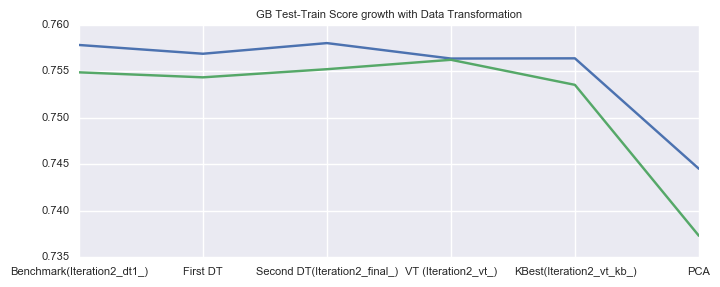

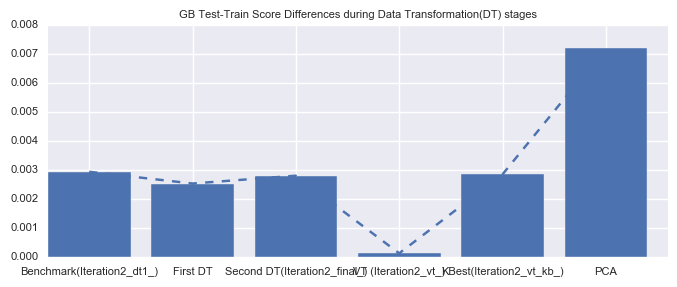

In [86]:
plot_size = (8, 3)

plt.figure(figsize=plot_size)
plt.plot(range(len(names)), gb_tr_scores)
plt.plot(range(len(names)), gb_te_scores)
plt.title('GB Test-Train Score growth with Data Transformation', fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(np.arange(len(names)) + .0004, names, fontsize=8)

plt.figure(figsize=plot_size)
plt.bar(np.arange(len(names)), gb_diff)
plt.plot(np.arange(len(names)) + .4, gb_diff, '--')
plt.xticks(np.arange(len(names)) + .4, names, fontsize=8)
plt.title('GB Test-Train Score Differences during Data Transformation(DT) stages', fontsize=8)
plt.yticks(fontsize=8)

ValueError: x and y must have same first dimension

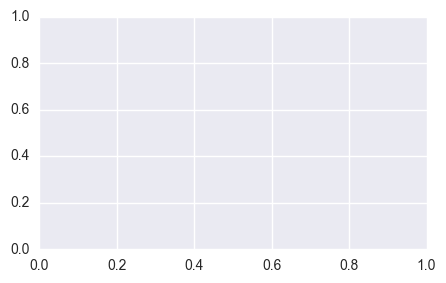

In [51]:
plt.figure(figsize=(5, 3))
plt.plot(range(3), rf_tr_scores)
plt.plot(range(3), rf_te_scores)
plt.title('GB Test-Train Score growth with Data Transformation', fontsize=8)
plt.yticks(fontsize=8)

plt.figure(figsize=(5, 3))
plt.bar(range(3), rf_diff)
plt.title('GB Test-Train Score Differences during Data Transformation(DT) stages', fontsize=8)
plt.xticks(np.arange(len(names)) + .4, names, fontsize=8)
plt.yticks(fontsize=8)